# 精准率与召回率的平衡

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
x = digits.data
y = digits.target.copy()

# 将数据进行转换，为使数据发生偏斜
y[digits.target == 9] = 1
y[digits.target != 9] = 0

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 666)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.score(x_test, y_test)

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [4]:
y_predict = log_reg.predict(x_test)

In [5]:
# 决策函数--获得决策之前的分数值
decision_scores = log_reg.decision_function(x_test)

In [6]:
np.min(decision_scores)

-85.68605733401593

In [7]:
np.max(decision_scores)

19.88956556899649

In [8]:
y_predict_2 = np.array(decision_scores>=-5, dtype=int)

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [10]:
confusion_matrix(y_test, y_predict_2)

array([[390,  15],
       [  5,  40]], dtype=int64)

In [11]:
f1_score(y_test, y_predict_2)

0.7999999999999999

# 总结：

* 1、可以通过设置decision的阈值来调整precision与recall
* 2、阈值左移，precision降低，recall上升
* 3、阈值右移，precision上升，recall下降

In [29]:
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

precisions = []
recalls = []
F1s = []

In [30]:
for i in thresholds:
    y_predict_temp = np.array(decision_scores>=i, dtype=int)
    precisions.append(precision_score(y_test, y_predict_temp))
    recalls.append(recall_score(y_test, y_predict_temp))
    F1s.append(f1_score(y_test, y_predict_temp))

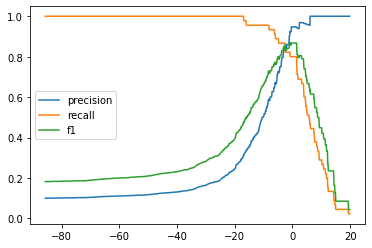

In [31]:
plt.plot(thresholds, precisions, label="precision")
plt.plot(thresholds, recalls, label="recall")
plt.plot(thresholds, F1s, label="f1")
plt.legend()
plt.show()

## precision-recall曲线

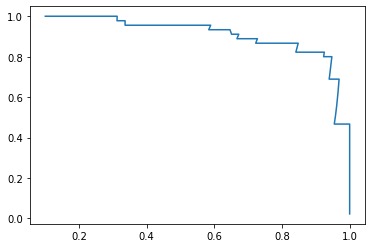

In [32]:
plt.plot(precisions, recalls)
plt.show()

## sklearn中的precision-recall曲线

In [36]:
from sklearn.metrics import precision_recall_curve

precison, recall, thershold = precision_recall_curve(y_test, decision_scores)

In [38]:
thershold.shape

(144,)

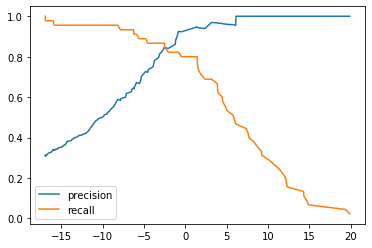

In [40]:
plt.plot(thershold, precison[:-1], label="precision")
plt.plot(thershold, recall[:-1], label="recall")
plt.legend()
plt.show()

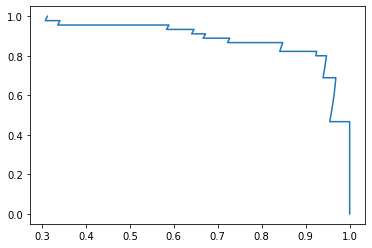

In [42]:
plt.plot(precison, recall)
plt.show()